In [2]:
import psycopg2
import pandas as pd
from datetime import datetime, date

In [3]:
pg_connection = psycopg2.connect(
    dbname="postgres",
    user="apparao",
    password="!bern@HARD23",
    host="thedb.postgres.database.azure.com",
    port="5432"
)

pg_cursor = pg_connection.cursor()

In [4]:
query_pres_results = 'select * from pres_election.v_pres_results_2020'
query_poll_results = 'select * from pres_election.v_pres_polls_2020'

In [5]:
pg_cursor.execute(query_pres_results)
rows = pg_cursor.fetchall()
elelction_results_columns = [col[0] for col  in pg_cursor.description]

pg_cursor.execute(query_poll_results)
rows_polls = pg_cursor.fetchall()
polling_columns = [col[0] for col  in pg_cursor.description]

In [6]:
pres_results_df = pd.DataFrame(rows, columns=elelction_results_columns)
polling_df = pd.DataFrame(rows_polls, columns=polling_columns)

In [7]:
pres_results_df.head()

,state,joe_biden,donald_trump,total_votes
0,MASSACHUSETTS,2382202,1167202,3658005
1,NEW JERSEY,2608335,1883274,4549353
2,ALASKA,153778,189951,357569
3,IDAHO,287021,554119,867361
4,NEBRASKA,374583,556846,951712


In [8]:
pres_results_df['joe_biden_percent'] = round((pres_results_df.joe_biden / pres_results_df.total_votes) * 100,0)
pres_results_df['donald_trump_percent'] = round((pres_results_df.donald_trump / pres_results_df.total_votes) * 100,0)

In [9]:
pres_results_df.dtypes

state                   object
joe_biden               object
donald_trump            object
total_votes              int64
joe_biden_percent       object
donald_trump_percent    object
dtype: object

In [10]:
pres_results_df.head()

,state,joe_biden,donald_trump,total_votes,joe_biden_percent,donald_trump_percent
0,MASSACHUSETTS,2382202,1167202,3658005,65.12298370286535967009339790,31.90815758863096141202650078
1,NEW JERSEY,2608335,1883274,4549353,57.33419675281298241749980712,41.39652385734850647993242116
2,ALASKA,153778,189951,357569,43.00652461482958533877377513,53.12289376316179534579339932
3,IDAHO,287021,554119,867361,33.09129647286423991855755562,63.88562547774225495497261233
4,NEBRASKA,374583,556846,951712,39.35886066373020409535657846,58.50992737298678591842910460


In [11]:
pres_results_df['joe_biden'] = pd.to_numeric(pres_results_df.joe_biden)
pres_results_df['donald_trump'] = pd.to_numeric(pres_results_df.donald_trump)
pres_results_df['joe_biden_percent'] = pd.to_numeric(pres_results_df.joe_biden_percent)
pres_results_df['donald_trump_percent'] = pd.to_numeric(pres_results_df.donald_trump_percent)

In [12]:
polling_df['cal_date'] = pd.to_datetime(polling_df.cal_date)

In [13]:
polling_df = polling_df.loc[polling_df.joe_biden.notnull()]

In [14]:
polling_df.state = polling_df.state.str.upper()

In [15]:
polling_df.tail()

,cal_date,state,joe_biden,donald_trump
11930,2020-11-03,WISCONSIN,53.716667,43.908333
11931,2020-11-02,WISCONSIN,54.500000,43.500000
11932,2020-11-02,WYOMING,32.500000,66.000000
11933,2020-11-03,WYOMING,32.750000,66.000000
11934,2020-11-01,WYOMING,33.000000,66.000000


In [16]:
swing_states = ['NEVADA','ARIZONA','COLORADO','TEXAS','WISCONSIN','IOWA','MICHIGAN','OHIO','PENNSYLVANIA','VIRGINIA','NORTH CAROLINA','GEORGIA','FLORIDA','MAINE','NEW HAMPSHIRE']

In [17]:
polling_df['swing_state'] = polling_df.state.isin(swing_states)
polling_df.head()

,cal_date,state,joe_biden,donald_trump,swing_state
60,2020-04-30,ARIZONA,49.5,44.5,True
61,2020-04-11,ARIZONA,49.5,44.5,True
62,2020-04-07,ARIZONA,49.5,44.5,True
63,2020-04-20,ARIZONA,49.5,44.5,True
64,2020-04-13,ARIZONA,49.5,44.5,True


In [18]:
merge_columns = ['state']

In [19]:
election_polls_df = pd.merge(polling_df, pres_results_df, on=merge_columns, how='left')

In [20]:
election_polls_df.head()

,cal_date,state,joe_biden_x,donald_trump_x,swing_state,joe_biden_y,donald_trump_y,total_votes,joe_biden_percent,donald_trump_percent
0,2020-04-30,ARIZONA,49.5,44.5,True,1672143.0,1661686.0,3385294.0,49.394321,49.085427
1,2020-04-11,ARIZONA,49.5,44.5,True,1672143.0,1661686.0,3385294.0,49.394321,49.085427
2,2020-04-07,ARIZONA,49.5,44.5,True,1672143.0,1661686.0,3385294.0,49.394321,49.085427
3,2020-04-20,ARIZONA,49.5,44.5,True,1672143.0,1661686.0,3385294.0,49.394321,49.085427
4,2020-04-13,ARIZONA,49.5,44.5,True,1672143.0,1661686.0,3385294.0,49.394321,49.085427


In [21]:
election_polls_df.columns = ['cal_date', 'state', 'joe_biden_poll_avg', 'donald_trump_poll_avg', 'swing_state', 'joe_biden_votes',
       'donald_trump_votes', 'total_votes', 'joe_biden_percent_votes',
       'donald_trump_percent_votes']

In [22]:
election_polls_df.head()

,cal_date,state,joe_biden_poll_avg,donald_trump_poll_avg,swing_state,joe_biden_votes,donald_trump_votes,total_votes,joe_biden_percent_votes,donald_trump_percent_votes
0,2020-04-30,ARIZONA,49.5,44.5,True,1672143.0,1661686.0,3385294.0,49.394321,49.085427
1,2020-04-11,ARIZONA,49.5,44.5,True,1672143.0,1661686.0,3385294.0,49.394321,49.085427
2,2020-04-07,ARIZONA,49.5,44.5,True,1672143.0,1661686.0,3385294.0,49.394321,49.085427
3,2020-04-20,ARIZONA,49.5,44.5,True,1672143.0,1661686.0,3385294.0,49.394321,49.085427
4,2020-04-13,ARIZONA,49.5,44.5,True,1672143.0,1661686.0,3385294.0,49.394321,49.085427


In [23]:
election_polls_df.dtypes

cal_date                      datetime64[ns]
state                                 object
joe_biden_poll_avg                   float64
donald_trump_poll_avg                float64
swing_state                             bool
joe_biden_votes                      float64
donald_trump_votes                   float64
total_votes                          float64
joe_biden_percent_votes              float64
donald_trump_percent_votes           float64
dtype: object

In [24]:
election_polls_df.describe()

,cal_date,joe_biden_poll_avg,donald_trump_poll_avg,joe_biden_votes,donald_trump_votes,total_votes,joe_biden_percent_votes,donald_trump_percent_votes
count,9859,9859.000000,9859.000000,9.453000e+03,9.453000e+03,9.453000e+03,9453.000000,9453.000000
mean,2020-08-01 10:06:52.617912576,49.590127,45.466677,1.715260e+06,1.568576e+06,3.345887e+06,48.762984,49.083956
min,2020-04-01 00:00:00,21.849999,5.500000,7.349100e+04,1.858600e+04,2.785030e+05,26.387867,5.397321
25%,2020-06-19 00:00:00,42.315001,38.580000,4.249370e+05,5.541190e+05,9.239650e+05,40.551653,41.396524
50%,2020-08-04 00:00:00,48.130001,45.200000,1.091541e+06,1.326418e+06,2.374321e+06,49.394321,49.251693
75%,2020-09-19 00:00:00,56.146667,52.642083,2.413568e+06,1.883274e+06,4.462600e+06,56.453319,57.602955
max,2020-11-03 00:00:00,93.000000,77.985001,1.111025e+07,6.006429e+06,1.750088e+07,92.149694,69.499790
std,NaN,10.442908,10.641970,1.918518e+06,1.435812e+06,3.329676e+06,11.319953,11.326826


In [25]:
election_polls_df.loc[election_polls_df.joe_biden_percent_votes == min(election_polls_df.joe_biden_percent_votes)]

,cal_date,state,joe_biden_poll_avg,donald_trump_poll_avg,swing_state,joe_biden_votes,donald_trump_votes,total_votes,joe_biden_percent_votes,donald_trump_percent_votes
3028,2020-06-06,WYOMING,21.849999,77.985001,False,73491.0,193559.0,278503.0,26.387867,69.49979
3029,2020-06-07,WYOMING,21.849999,77.985001,False,73491.0,193559.0,278503.0,26.387867,69.49979
3030,2020-06-18,WYOMING,21.849999,77.985001,False,73491.0,193559.0,278503.0,26.387867,69.49979
3031,2020-06-25,WYOMING,21.849999,77.985001,False,73491.0,193559.0,278503.0,26.387867,69.49979
3032,2020-06-08,WYOMING,21.849999,77.985001,False,73491.0,193559.0,278503.0,26.387867,69.49979
...,...,...,...,...,...,...,...,...,...,...
9698,2020-10-23,WYOMING,30.500000,67.000000,False,73491.0,193559.0,278503.0,26.387867,69.49979
9699,2020-10-11,WYOMING,32.535088,65.552632,False,73491.0,193559.0,278503.0,26.387867,69.49979
9856,2020-11-02,WYOMING,32.500000,66.000000,False,73491.0,193559.0,278503.0,26.387867,69.49979
9857,2020-11-03,WYOMING,32.750000,66.000000,False,73491.0,193559.0,278503.0,26.387867,69.49979


In [26]:
election_polls_df['polling_delta_jb'] = election_polls_df.joe_biden_poll_avg - election_polls_df.donald_trump_poll_avg
election_polls_df['vote_percentage_delta_jb'] = election_polls_df.joe_biden_percent_votes - election_polls_df.donald_trump_percent_votes
election_polls_df['polling_voting_delta'] = election_polls_df.polling_delta_jb - election_polls_df.vote_percentage_delta_jb

In [27]:
election_polls_df.tail()

,cal_date,state,joe_biden_poll_avg,donald_trump_poll_avg,swing_state,joe_biden_votes,donald_trump_votes,total_votes,joe_biden_percent_votes,donald_trump_percent_votes,polling_delta_jb,vote_percentage_delta_jb,polling_voting_delta
9854,2020-11-03,WISCONSIN,53.716667,43.908333,True,1630673.0,1610065.0,3297352.0,49.454016,48.82903,9.808333,0.624986,9.183347
9855,2020-11-02,WISCONSIN,54.500000,43.500000,True,1630673.0,1610065.0,3297352.0,49.454016,48.82903,11.000000,0.624986,10.375014
9856,2020-11-02,WYOMING,32.500000,66.000000,False,73491.0,193559.0,278503.0,26.387867,69.49979,-33.500000,-43.111923,9.611923
9857,2020-11-03,WYOMING,32.750000,66.000000,False,73491.0,193559.0,278503.0,26.387867,69.49979,-33.250000,-43.111923,9.861923
9858,2020-11-01,WYOMING,33.000000,66.000000,False,73491.0,193559.0,278503.0,26.387867,69.49979,-33.000000,-43.111923,10.111923


In [28]:
election_polls_df.dtypes

cal_date                      datetime64[ns]
state                                 object
joe_biden_poll_avg                   float64
donald_trump_poll_avg                float64
swing_state                             bool
joe_biden_votes                      float64
donald_trump_votes                   float64
total_votes                          float64
joe_biden_percent_votes              float64
donald_trump_percent_votes           float64
polling_delta_jb                     float64
vote_percentage_delta_jb             float64
polling_voting_delta                 float64
dtype: object

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [30]:
election_polls_df['cal_date']

0      2020-04-30
1      2020-04-11
2      2020-04-07
3      2020-04-20
4      2020-04-13
          ...    
9854   2020-11-03
9855   2020-11-02
9856   2020-11-02
9857   2020-11-03
9858   2020-11-01
Name: cal_date, Length: 9859, dtype: datetime64[ns]

In [31]:
plt.figure(figsize=(25,8))

<Figure size 2500x800 with 0 Axes>

<Figure size 2500x800 with 0 Axes>

In [32]:
columns = ['cal_date','polling_voting_delta','swing_state']
election_polls_deltas = election_polls_df[columns]

In [33]:
election_polls_deltas_ss = election_polls_deltas.loc[election_polls_deltas.swing_state == True]

In [34]:
election_polls_deltas_ss.describe()

,cal_date,polling_voting_delta
count,3133,3133.000000
mean,2020-07-21 00:53:46.556016640,3.682909
min,2020-04-01 00:00:00,-11.051881
25%,2020-05-31 00:00:00,1.695049
50%,2020-07-22 00:00:00,4.165049
75%,2020-09-12 00:00:00,6.041680
max,2020-11-03 00:00:00,16.358369
std,NaN,3.623890


<Axes: xlabel='cal_date', ylabel='polling_voting_delta'>

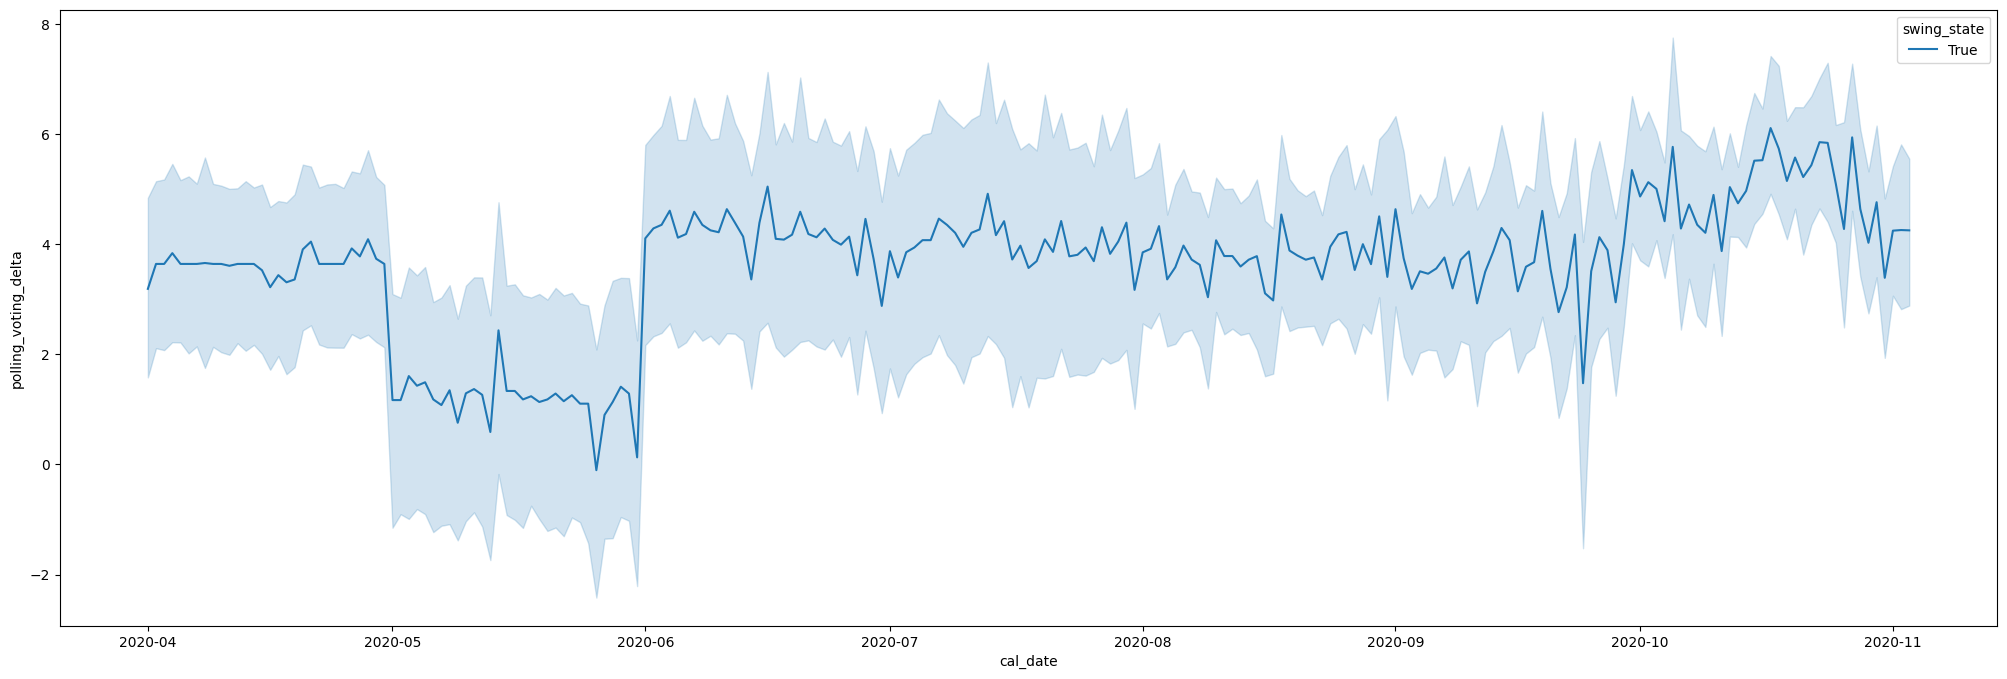

In [35]:
plt.figure(figsize=(25,8))
sns.lineplot(x='cal_date', y='polling_voting_delta', hue='swing_state', data=election_polls_deltas_ss)

In [36]:
election_polls_deltas_ss_post_may = election_polls_deltas_ss.loc[election_polls_deltas_ss.cal_date >='2020-06-01']

<Axes: xlabel='cal_date', ylabel='polling_voting_delta'>

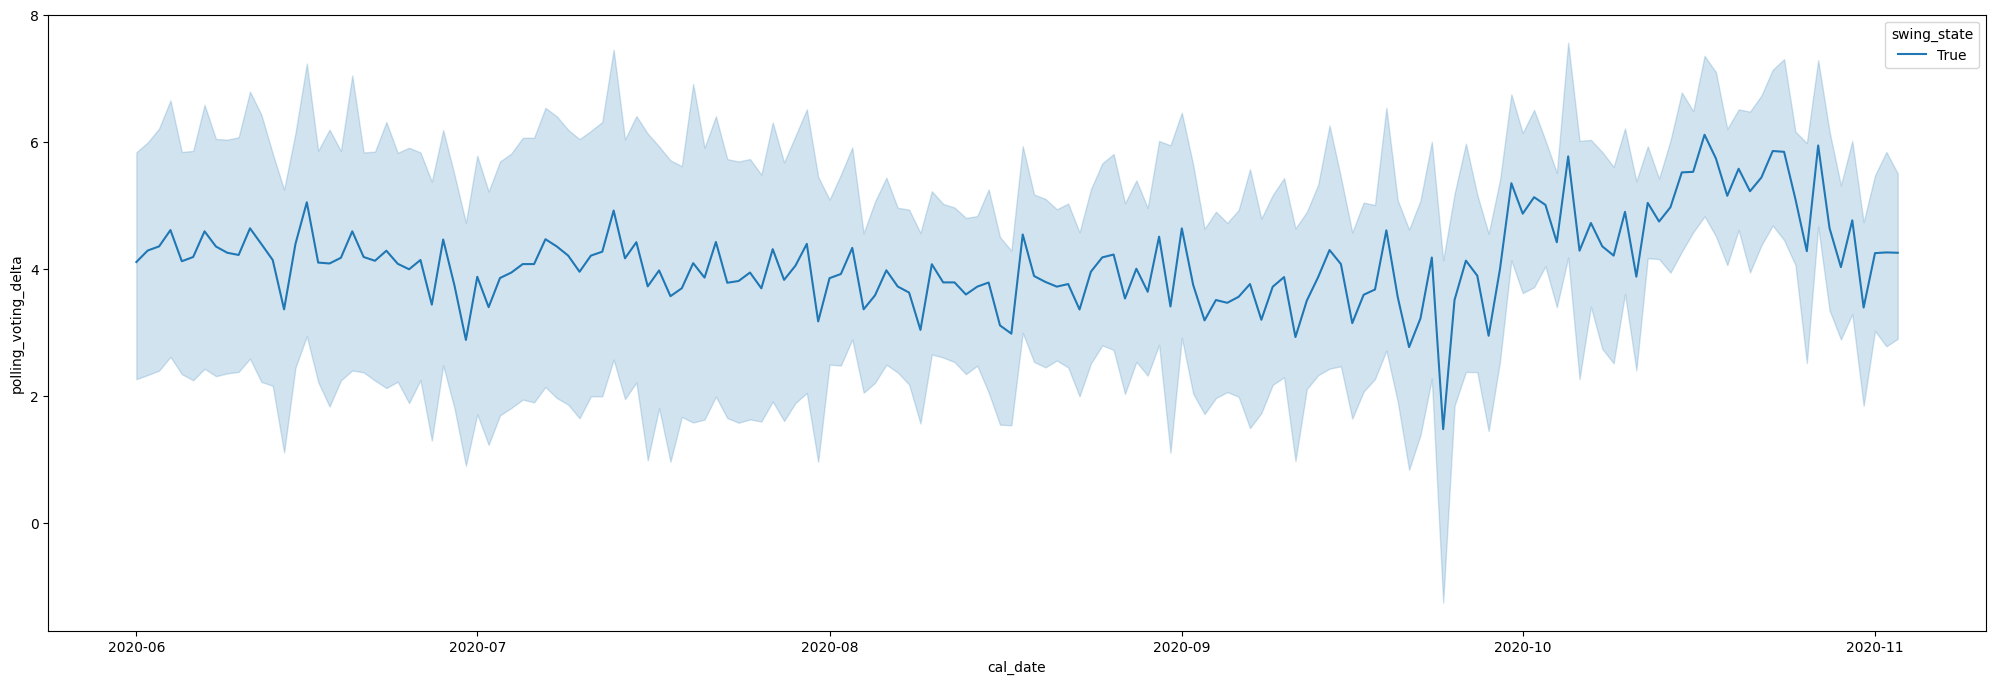

In [37]:
plt.figure(figsize=(25,8))
sns.lineplot(x='cal_date', y='polling_voting_delta', hue='swing_state', data=election_polls_deltas_ss_post_may)

In [38]:
election_polls_deltas_ss_post_may_monthly_std = election_polls_deltas_ss_post_may.groupby(election_polls_deltas_ss_post_may.cal_date.dt.month).polling_voting_delta.aggregate(['mean','median','std']).reset_index()

In [39]:
election_polls_deltas_ss_post_may_monthly_std
election_polls_deltas_ss_post_may_monthly_std_pivot = pd.melt(election_polls_deltas_ss_post_may_monthly_std, id_vars='cal_date',var_name='aggregate_metric')
election_polls_deltas_ss_post_may_monthly_std_pivot.head()

,cal_date,aggregate_metric,value
0,6,mean,4.177394
1,7,mean,4.015883
2,8,mean,3.766318
3,9,mean,3.645352
4,10,mean,4.980971


<Axes: xlabel='cal_date', ylabel='value'>

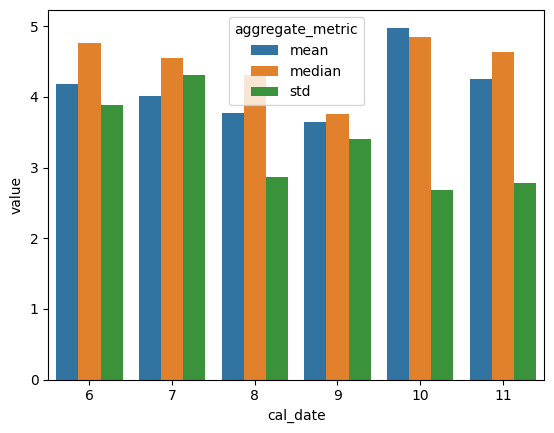

In [40]:
sns.barplot(x='cal_date', y='value',hue='aggregate_metric', data=election_polls_deltas_ss_post_may_monthly_std_pivot)

In [41]:
election_polls_df

,cal_date,state,joe_biden_poll_avg,donald_trump_poll_avg,swing_state,joe_biden_votes,donald_trump_votes,total_votes,joe_biden_percent_votes,donald_trump_percent_votes,polling_delta_jb,vote_percentage_delta_jb,polling_voting_delta
0,2020-04-30,ARIZONA,49.500000,44.500000,True,1672143.0,1661686.0,3385294.0,49.394321,49.085427,5.000000,0.308895,4.691105
1,2020-04-11,ARIZONA,49.500000,44.500000,True,1672143.0,1661686.0,3385294.0,49.394321,49.085427,5.000000,0.308895,4.691105
2,2020-04-07,ARIZONA,49.500000,44.500000,True,1672143.0,1661686.0,3385294.0,49.394321,49.085427,5.000000,0.308895,4.691105
3,2020-04-20,ARIZONA,49.500000,44.500000,True,1672143.0,1661686.0,3385294.0,49.394321,49.085427,5.000000,0.308895,4.691105
4,2020-04-13,ARIZONA,49.500000,44.500000,True,1672143.0,1661686.0,3385294.0,49.394321,49.085427,5.000000,0.308895,4.691105
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9854,2020-11-03,WISCONSIN,53.716667,43.908333,True,1630673.0,1610065.0,3297352.0,49.454016,48.829030,9.808333,0.624986,9.183347
9855,2020-11-02,WISCONSIN,54.500000,43.500000,True,1630673.0,1610065.0,3297352.0,49.454016,48.829030,11.000000,0.624986,10.375014
9856,2020-11-02,WYOMING,32.500000,66.000000,False,73491.0,193559.0,278503.0,26.387867,69.499790,-33.500000,-43.111923,9.611923
9857,2020-11-03,WYOMING,32.750000,66.000000,False,73491.0,193559.0,278503.0,26.387867,69.499790,-33.250000,-43.111923,9.861923


In [42]:
election_polls_df['election_date'] = '2020-11-03'
election_polls_df['election_date'] = pd.to_datetime(election_polls_df['election_date'])

In [43]:
groupby_columns = ['cal_date', 'state']
election_polls_df['days_to_election']  = election_polls_df.election_date - election_polls_df.cal_date
election_polls_df['month_of_poll'] = election_polls_df.cal_date.dt.month
election_polls_df_daily_avg = election_polls_df.groupby(groupby_columns).mean()

In [44]:
election_polls_df_daily_avg.reset_index(inplace=True)

In [45]:
election_polls_df_daily_avg['swing_state'] = election_polls_df_daily_avg['swing_state'].isin(swing_states)

In [46]:
election_polls_df_daily_avg_oct = election_polls_df_daily_avg.loc[election_polls_df_daily_avg.month_of_poll == 10]

In [47]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

<Axes: xlabel='polling_voting_delta', ylabel='Count'>

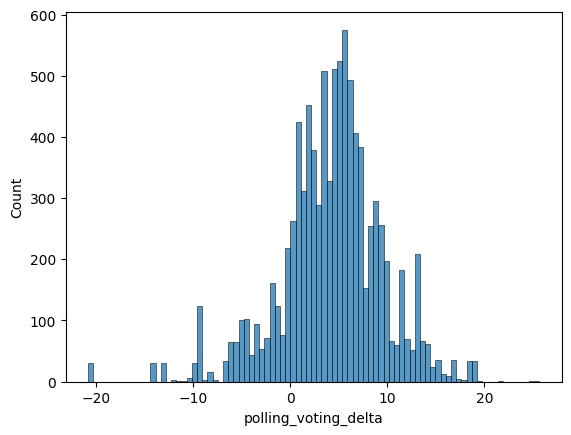

In [48]:
sns.histplot(election_polls_df_daily_avg.polling_voting_delta)

In [49]:
election_polls_df_daily_avg_oct

,cal_date,state,joe_biden_poll_avg,donald_trump_poll_avg,swing_state,joe_biden_votes,donald_trump_votes,total_votes,joe_biden_percent_votes,donald_trump_percent_votes,polling_delta_jb,vote_percentage_delta_jb,polling_voting_delta,election_date,days_to_election,month_of_poll
8026,2020-10-01,ALABAMA,39.477778,57.863492,False,849624.0,1441170.0,2323282.0,36.569990,62.031643,-18.385714,-25.461653,7.075939,2020-11-03,33 days,10.0
8027,2020-10-01,ALASKA,44.350000,52.641667,False,153778.0,189951.0,357569.0,43.006525,53.122894,-8.291667,-10.116369,1.824702,2020-11-03,33 days,10.0
8028,2020-10-01,ARIZONA,50.381609,45.394425,False,1672143.0,1661686.0,3385294.0,49.394321,49.085427,4.987184,0.308895,4.678289,2020-11-03,33 days,10.0
8029,2020-10-01,ARKANSAS,39.701754,58.078947,False,423932.0,760647.0,1219069.0,34.775062,62.395730,-18.377193,-27.620668,9.243475,2020-11-03,33 days,10.0
8030,2020-10-01,CALIFORNIA,62.191667,35.340000,False,11110250.0,6006429.0,17500881.0,63.483947,34.320724,26.851667,29.163223,-2.311557,2020-11-03,33 days,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9695,2020-10-31,VIRGINIA,56.500000,41.000000,False,2413568.0,1962430.0,4462600.0,54.084345,43.975037,15.500000,10.109308,5.390692,2020-11-03,3 days,10.0
9696,2020-10-31,WASHINGTON,62.000000,35.500000,False,2369612.0,1584651.0,4087631.0,57.970301,38.766978,26.500000,19.203323,7.296677,2020-11-03,3 days,10.0
9697,2020-10-31,WEST VIRGINIA,32.500000,66.500000,False,235984.0,545382.0,794652.0,29.696521,68.631552,-34.000000,-38.935031,4.935031,2020-11-03,3 days,10.0
9698,2020-10-31,WISCONSIN,52.480000,44.440000,False,1630673.0,1610065.0,3297352.0,49.454016,48.829030,8.039999,0.624986,7.415013,2020-11-03,3 days,10.0


In [50]:
cluster_columns = election_polls_df_daily_avg_oct.loc[:,['state','polling_voting_delta','joe_biden_poll_avg','donald_trump_poll_avg']]

In [51]:
cluster_columns = cluster_columns.dropna()

In [52]:
encoder = LabelEncoder()
cluster_columns['encoded_states'] = encoder.fit_transform(cluster_columns.state)
cluster_columns

,state,polling_voting_delta,joe_biden_poll_avg,donald_trump_poll_avg,encoded_states
8026,ALABAMA,7.075939,39.477778,57.863492,0
8027,ALASKA,1.824702,44.350000,52.641667,1
8028,ARIZONA,4.678289,50.381609,45.394425,2
8029,ARKANSAS,9.243475,39.701754,58.078947,3
8030,CALIFORNIA,-2.311557,62.191667,35.340000,4
...,...,...,...,...,...
9695,VIRGINIA,5.390692,56.500000,41.000000,46
9696,WASHINGTON,7.296677,62.000000,35.500000,47
9697,WEST VIRGINIA,4.935031,32.500000,66.500000,48
9698,WISCONSIN,7.415013,52.480000,44.440000,49


In [53]:
cluster_columns.drop(columns=['state'], inplace=True)

In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [55]:
forest_model = RandomForestRegressor(random_state=1)

In [56]:
election_polls_df

,cal_date,state,joe_biden_poll_avg,donald_trump_poll_avg,swing_state,joe_biden_votes,donald_trump_votes,total_votes,joe_biden_percent_votes,donald_trump_percent_votes,polling_delta_jb,vote_percentage_delta_jb,polling_voting_delta,election_date,days_to_election,month_of_poll
0,2020-04-30,ARIZONA,49.500000,44.500000,True,1672143.0,1661686.0,3385294.0,49.394321,49.085427,5.000000,0.308895,4.691105,2020-11-03,187 days,4
1,2020-04-11,ARIZONA,49.500000,44.500000,True,1672143.0,1661686.0,3385294.0,49.394321,49.085427,5.000000,0.308895,4.691105,2020-11-03,206 days,4
2,2020-04-07,ARIZONA,49.500000,44.500000,True,1672143.0,1661686.0,3385294.0,49.394321,49.085427,5.000000,0.308895,4.691105,2020-11-03,210 days,4
3,2020-04-20,ARIZONA,49.500000,44.500000,True,1672143.0,1661686.0,3385294.0,49.394321,49.085427,5.000000,0.308895,4.691105,2020-11-03,197 days,4
4,2020-04-13,ARIZONA,49.500000,44.500000,True,1672143.0,1661686.0,3385294.0,49.394321,49.085427,5.000000,0.308895,4.691105,2020-11-03,204 days,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9854,2020-11-03,WISCONSIN,53.716667,43.908333,True,1630673.0,1610065.0,3297352.0,49.454016,48.829030,9.808333,0.624986,9.183347,2020-11-03,0 days,11
9855,2020-11-02,WISCONSIN,54.500000,43.500000,True,1630673.0,1610065.0,3297352.0,49.454016,48.829030,11.000000,0.624986,10.375014,2020-11-03,1 days,11
9856,2020-11-02,WYOMING,32.500000,66.000000,False,73491.0,193559.0,278503.0,26.387867,69.499790,-33.500000,-43.111923,9.611923,2020-11-03,1 days,11
9857,2020-11-03,WYOMING,32.750000,66.000000,False,73491.0,193559.0,278503.0,26.387867,69.499790,-33.250000,-43.111923,9.861923,2020-11-03,0 days,11


In [57]:
encoder = OneHotEncoder()

In [58]:
encoder_data = encoder.fit_transform(election_polls_df[['swing_state']]).toarray()
encoded_df = pd.DataFrame(encoder_data,columns=encoder.get_feature_names_out())

In [59]:
election_polls_df_encoded = pd.concat([election_polls_df, encoded_df], axis=1)

In [60]:
election_polls_df_encoded

,cal_date,state,joe_biden_poll_avg,donald_trump_poll_avg,swing_state,joe_biden_votes,donald_trump_votes,total_votes,joe_biden_percent_votes,donald_trump_percent_votes,polling_delta_jb,vote_percentage_delta_jb,polling_voting_delta,election_date,days_to_election,month_of_poll,swing_state_False,swing_state_True
0,2020-04-30,ARIZONA,49.500000,44.500000,True,1672143.0,1661686.0,3385294.0,49.394321,49.085427,5.000000,0.308895,4.691105,2020-11-03,187 days,4,0.0,1.0
1,2020-04-11,ARIZONA,49.500000,44.500000,True,1672143.0,1661686.0,3385294.0,49.394321,49.085427,5.000000,0.308895,4.691105,2020-11-03,206 days,4,0.0,1.0
2,2020-04-07,ARIZONA,49.500000,44.500000,True,1672143.0,1661686.0,3385294.0,49.394321,49.085427,5.000000,0.308895,4.691105,2020-11-03,210 days,4,0.0,1.0
3,2020-04-20,ARIZONA,49.500000,44.500000,True,1672143.0,1661686.0,3385294.0,49.394321,49.085427,5.000000,0.308895,4.691105,2020-11-03,197 days,4,0.0,1.0
4,2020-04-13,ARIZONA,49.500000,44.500000,True,1672143.0,1661686.0,3385294.0,49.394321,49.085427,5.000000,0.308895,4.691105,2020-11-03,204 days,4,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9854,2020-11-03,WISCONSIN,53.716667,43.908333,True,1630673.0,1610065.0,3297352.0,49.454016,48.829030,9.808333,0.624986,9.183347,2020-11-03,0 days,11,0.0,1.0
9855,2020-11-02,WISCONSIN,54.500000,43.500000,True,1630673.0,1610065.0,3297352.0,49.454016,48.829030,11.000000,0.624986,10.375014,2020-11-03,1 days,11,0.0,1.0
9856,2020-11-02,WYOMING,32.500000,66.000000,False,73491.0,193559.0,278503.0,26.387867,69.499790,-33.500000,-43.111923,9.611923,2020-11-03,1 days,11,1.0,0.0
9857,2020-11-03,WYOMING,32.750000,66.000000,False,73491.0,193559.0,278503.0,26.387867,69.499790,-33.250000,-43.111923,9.861923,2020-11-03,0 days,11,1.0,0.0


In [63]:
election_polls_df_encoded_model = election_polls_df_encoded.drop(['cal_date','state', 'swing_state', 'election_date'], axis=1)

In [65]:
election_polls_df_encoded_model.to_csv('polls_only_model.csv')